In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

#Rewrite
class Neural_Network:

    def __init__(self, system, alpha = 0.1, niter = 1, thetas = None):
        self.system = system;
        self.alpha = alpha;
        self.niter = niter;
        self.thetas = thetas;
    
    def activation(self, z):
        return 1/(1+np.exp(-z));

    def generateThetas(self): #create random array of thetas
        thetas = [];
        for layer in range(1, len(self.system)):
            thetas.append([]);
            for neuron in range(self.system[layer]): ##system must specify how many non-bias neurons are in each layer
                thetas[-1].append((np.random.rand(1, self.system[layer-1]+1)*2 - 1)[0]); #random array of floats, one row, add one index for the bias
        self.thetas = thetas;

    def forwardProp(self, x0):
        values = [np.concatenate(([1],x0))]; #add the bias
        for layer in range(1, len(self.system)):
            values.append(np.concatenate((np.array([1]), self.activation(np.dot(self.thetas[layer-1], values[layer-1])).reshape(1,-1)[0]))); #add bias, activation of z_i (thetas * neurons)
        return values

    def backProp(self, data, target):
        values = self.forwardProp(data); #calculate all of the values
        deltas = [[]]; #first (last) layer of deltas
        for i in range(1, len(values[-1])): #ignore bias which is the first element
            deltas[0].append(-2*(target[i-1]-values[-1][i])*values[-1][i]*(1-values[-1][i])) #definition of deltas
            self.thetas[-1][i-1] -= self.alpha * deltas[0][-1]*values[-2] ##gradient descent

        for layer in range(len(values)-2, 0 , -1): ##dont include first layer because we already calculated it, dont include last because its the input layer
            deltas.append([]);
            for i in range(1,len(values[layer])): #ignore bias, doesnt matter for backwards propagation
                s = deltas[-2]@np.array(self.thetas[layer])[:,i]
                deltas[-1].append(s*values[layer][i]*(1-values[layer][i])); #none go to bias, 2d arr which is practically a single dim array so we take 0 coord, ith neuron is what we are looking for
                self.thetas[layer-1][i-1] -= self.alpha * deltas[-1][-1]*values[layer-1]; ##read

    def solve(self, data, target):
        self.generateThetas();
        for iteration in range(self.niter):
            for point in range(len(data)):
                self.backProp(data[point], target[point]);

    def evaluate(self, evalClass = 0): ##using confusion matrix stuff
        confusion = np.zeros((len(self.target[0]), len(self.target[0])));
        for i in range(len(self.data)):
            p = self.predict(self.data[i]);
            t = self.target[i];
            confusion[np.argmax(t)][np.argmax(p)]+=1;

        return "Accuracy: " + str(np.trace(confusion) / np.sum(confusion)) + " | Precision " + str(evalClass) + ": " + \
            str(confusion[evalClass][evalClass]/np.sum(confusion, 1)[evalClass]) + " | Recall " + str(evalClass) + ": " + \
                str(confusion[evalClass][evalClass]/np.sum(confusion, 0)[evalClass])

    def predict(self, x0):
        return self.forwardProp(x0)[-1][1:];

In [5]:
with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

FileNotFoundError: [Errno 2] No such file or directory: 'pickled_mnist.pkl'

In [3]:
target = []
for i in range(len(train_labels)):
    temp = np.zeros(10)
    #temp+=0.01;
    temp[int(train_labels[i][0])] = 1;
    target.append(temp)

In [7]:
sol = Neural_Network([784, 100, 10 , 10],alpha=0.1, niter=1)
sol.solve(train_imgs[:1000], target[:1000])

In [8]:
sol.data = train_imgs
sol.target = target
sol.evaluate()

'Accuracy: 0.43245 | Precision 0: 0.6317744386290731 | Recall 0: 0.5732230392156863'

In [297]:
sol.niter = 1
sol.data = train_imgs
sol.target = target
sol.solve()

In [299]:
sol.evaluate(6)

'Accuracy: 0.8746333333333334 | Precision 6: 0.9427171341669482 | Recall 6: 0.9129438717067583'

In [240]:
target2 = [];
for i in range(len(test_labels)):
    temp = np.zeros(10)
    #temp+=0.01;
    temp[int(test_labels[i][0])] = 1;
    target2.append(temp)

In [249]:
data2 = []
for i in range(len(test_imgs)):
    data2.append(test_imgs[i][1:])

In [294]:
sol.data = data2
sol.target = target2
sol.evaluate(6)

'Accuracy: 0.8789 | Precision 6: 0.9436325678496869 | Recall 6: 0.8785228377065112'

In [284]:
sol.predict(train_imgs[7])

array([0.01705221, 0.02188823, 0.03852495, 0.82421026, 0.02920961,
       0.07382328, 0.02171628, 0.01911266, 0.14330266, 0.03880228])

In [17]:
def convertToList(thetas):
    new = []
    for i in range(len(thetas)):
        new.append([])
        for j in range(len(thetas[i])):
            new[-1].append([])
            for k in range(len(thetas[i][j])):
                new[-1][-1].append(thetas[i][j][k])
    return new 
    

In [18]:
a = convertToList(sol.thetas)

In [69]:
import json

json_string = json.dumps(a)
with open('data.json', 'w') as f:
    json.dump(a, f)

# Preprocessing

In [8]:
image_size = 28 # width and length
n_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",")

In [19]:
train_imgs = train_data[:, 1:] * 0.99/255 + 0.01
test_imgs = test_data * 0.99/255 + 0.01

train_labels = train_data[:, :1]
test_labels = test_data[:, :1]

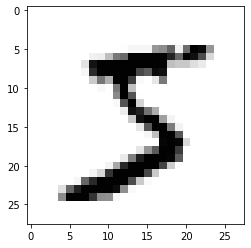

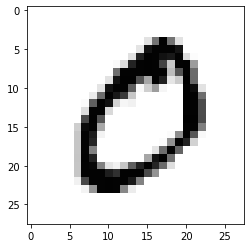

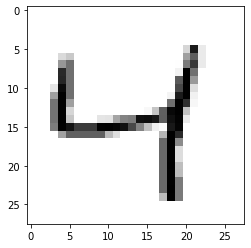

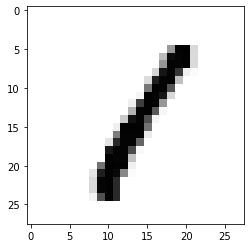

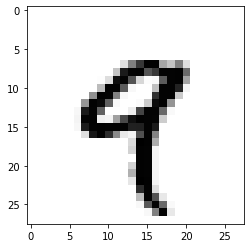

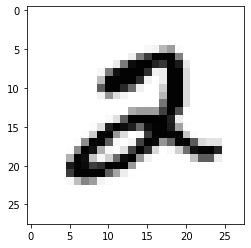

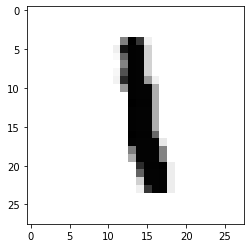

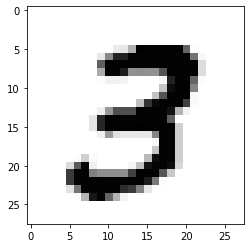

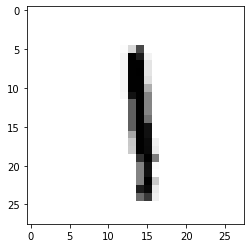

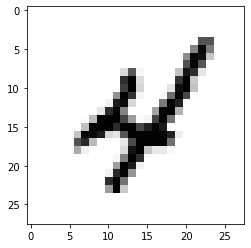

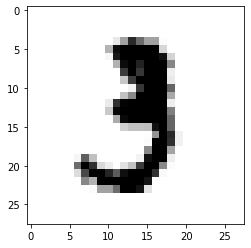

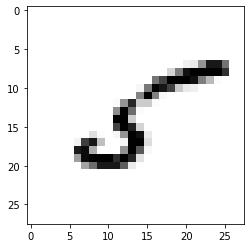

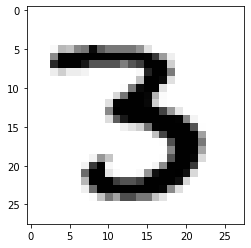

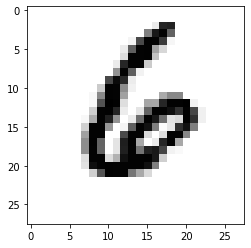

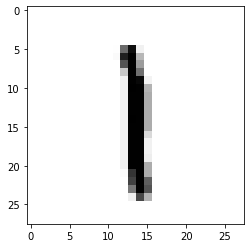

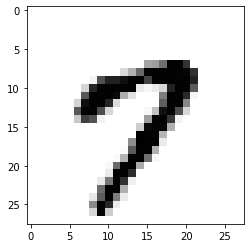

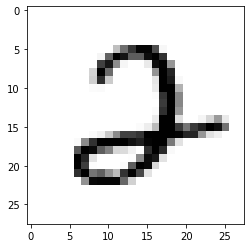

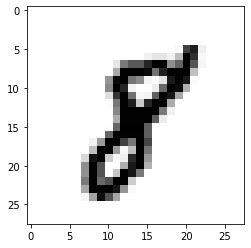

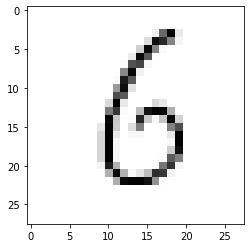

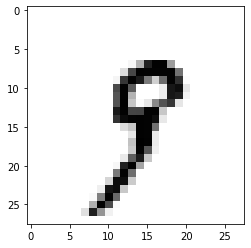

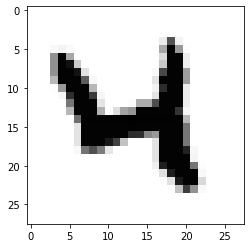

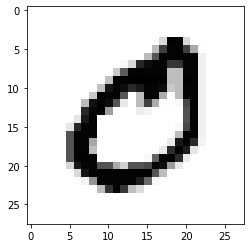

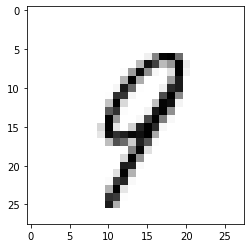

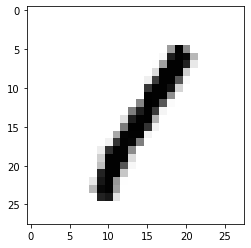

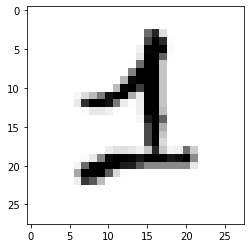

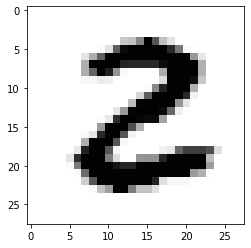

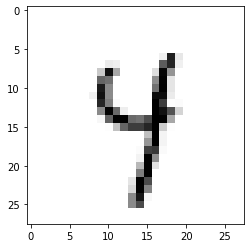

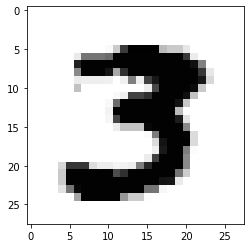

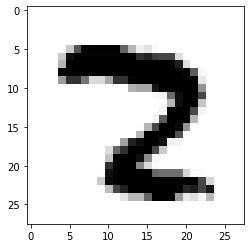

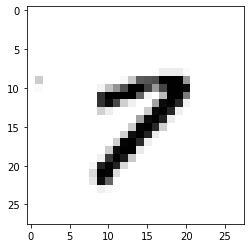

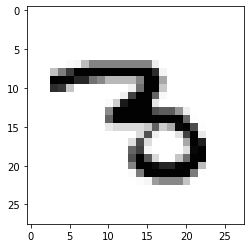

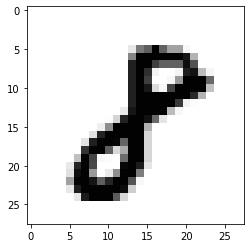

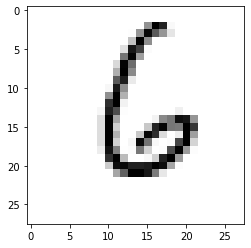

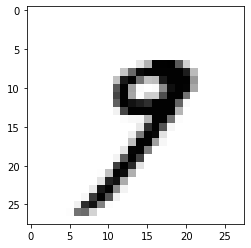

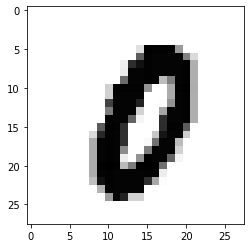

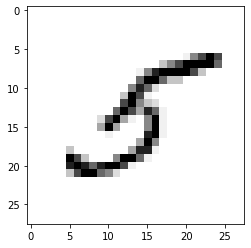

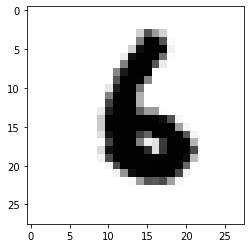

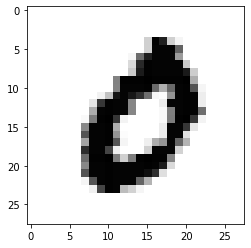

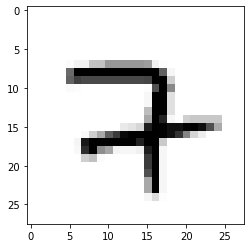

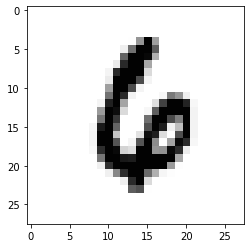

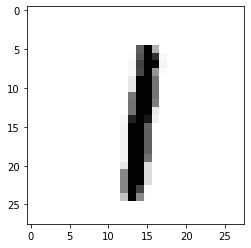

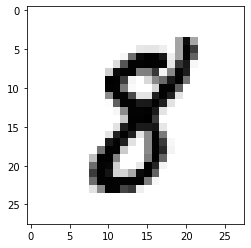

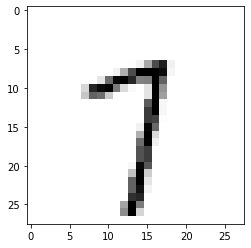

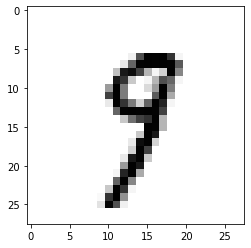

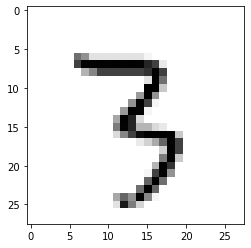

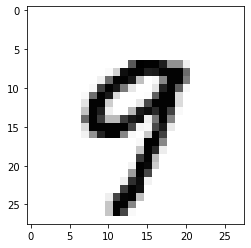

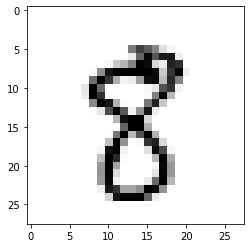

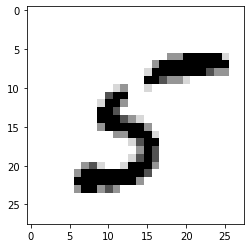

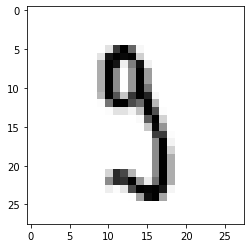

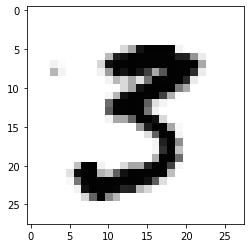

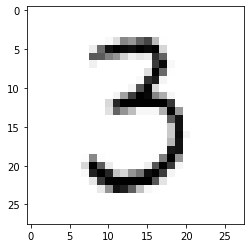

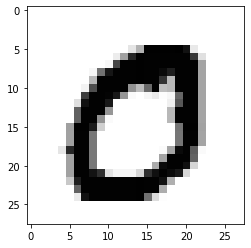

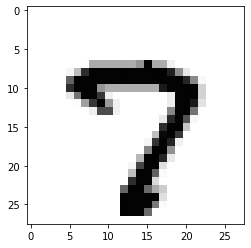

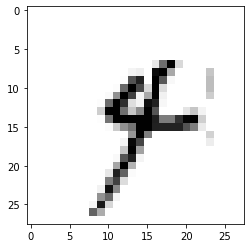

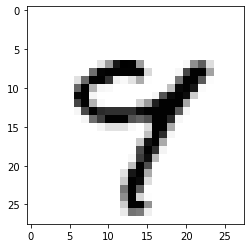

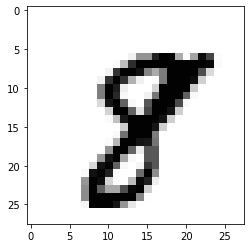

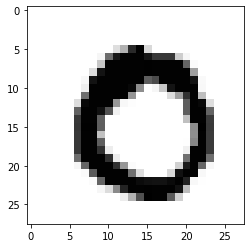

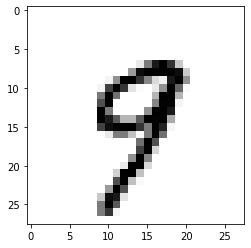

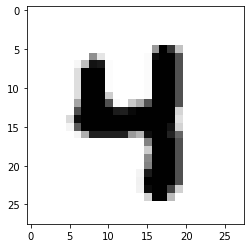

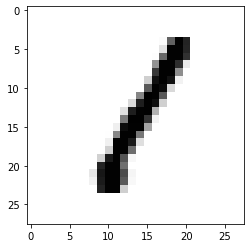

In [298]:
for i in range(60):
    #if(train_labels[i][0] == 5):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [9]:
import pickle

lr = np.arange(n_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(float)
test_labels_one_hot = (lr==test_labels).astype(float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

with open("pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels)
    
    pickle.dump(data, fh)

with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]

train_labels_one_hot = (lr==train_labels).astype(float)
test_labels_one_hot = (lr==test_labels).astype(float)


image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [11]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])